# K-Vector Model (Gabe Profile)

### Nexus-5x 전면 카메라

|resolution|fx|cx|fy|cy|k1|k2|p1|p2|k3|
|---|---|---|---|---|---|---|---|---|---|
|1920x1080|1433.4389|587.7184|1437.476|604.914|-0.4355|0.6174|-0.0008|-0.0049|-0.3697|
|1080x720|946.2767|612.9987|950.3305|326.0792|0.0438|-0.6156|-0.0125|-0.004|0.5669|

<br>


# imports

In [1]:
import sys
import cv2
import math
import glob
import matplotlib.pyplot as plt

sys.path.append("../../../../")
%matplotlib inline

%run ../../../../al/actor/face.py
%run ../../../../ac/visualizer/plotter.py
%run ../../../../ac/visualizer/trajectory.py
%run ../../../../al/optics/parameter.py
%run ../../../../al/actor/screen.py
%run ../../../../al/feature/face/candide.py
%run ../../../../ds/device/nexus5x.py

%run ../../../../ac/common/videos.py
%run ../../../../ac/math/angles.py
%run ../../../../ac/images/orientations.py
%run ../../../../ac/math/tolerance.py

Using TensorFlow backend.


# resource paths

In [2]:
candide_path="/home/chy/archive-model/candide/candide.npz"
land_mark_path="/home/chy/archive-model/candide/shape_predictor_68_face_landmarks.dat"
model_path = "/home/chy/archive-model/incubator/ove/exp-home2-model.json"
weight_path = "/home/chy/archive-model/incubator/ove/exp-home2-24e-weights.hdf5"
sample_path = "/home/chy/dev-bench/auto-catch/notes/dataset/profiles/david/"

In [3]:
# video to frames
# video_path = "{}/1280-720.mp4".format(sample_path)
# save_path = "{}/frames/".format(sample_path)
# video_to_frames(video_path, save_path)

In [4]:
# frame_path = "{}/frames/".format(sample_path)
# apply_rotate_to_images(frame_path, 90)

# prepare data

In [5]:
def load_img(idx):
    img_path = "{}/frames/{}.jpg".format(sample_path, idx)
    return cv2.imread(img_path)

imgs = []
for idx in range(11):
    img = load_img(idx)
    imgs.append(img)

# Face Module

In [6]:
candide = Candide(candide_path, land_mark_path)

intrinsic_param = IntrinsicParameters(946.2767, 950.3305, 612.9987, 326.0792)
screen = Screen(720, 1080)
camera = Camera(2.6, intrinsic_param, screen)

opt_predictor = OpticalAxisPredictor()
opt_predictor.load_model(model_path, weight_path)
face_model = FaceModel(candide)
face = Face(camera, face_model, opt_predictor, reference_fissure_length=20)

# 검증

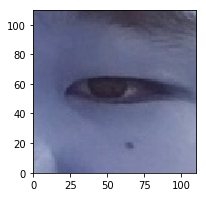

[0/r] ---------------------------------------------
pos (-28.64 60.00 182.21)
opt (-0.35 -0.02 -0.94)
opt YP (20.62909057659528, -1.0706350338855548)


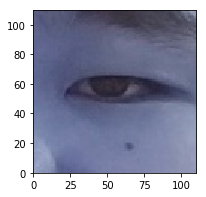

[1/r] ---------------------------------------------
pos (-28.77 61.09 188.38)
opt (-0.25 -0.12 -0.96)
opt YP (14.38887094897343, -6.926041056616948)


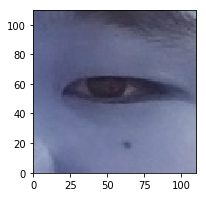

[2/r] ---------------------------------------------
pos (-26.76 59.47 182.21)
opt (-0.32 0.01 -0.95)
opt YP (18.571718070276965, 0.5272815859408458)


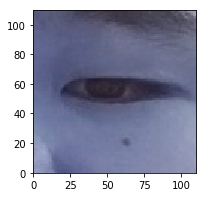

[3/r] ---------------------------------------------
pos (-25.46 59.52 182.21)
opt (-0.38 0.10 -0.92)
opt YP (22.233276616388668, 5.5810005047834865)


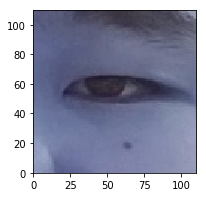

[4/r] ---------------------------------------------
pos (-27.49 57.70 182.21)
opt (-0.36 -0.07 -0.93)
opt YP (21.037361719138207, -3.9766518211104906)


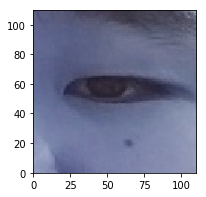

[5/r] ---------------------------------------------
pos (-29.66 59.80 188.38)
opt (-0.20 -0.08 -0.98)
opt YP (11.595087083138203, -4.672863248493646)


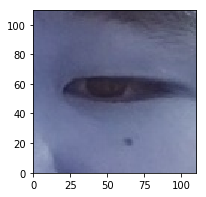

[6/r] ---------------------------------------------
pos (-27.23 56.95 179.24)
opt (-0.39 0.08 -0.92)
opt YP (23.03631220239082, 4.653640961735114)


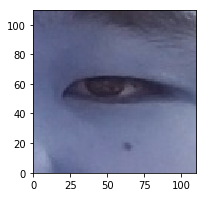

[7/r] ---------------------------------------------
pos (-28.73 57.68 185.24)
opt (-0.32 -0.07 -0.95)
opt YP (18.542433634210536, -4.053299777089551)


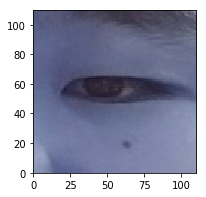

[8/r] ---------------------------------------------
pos (-26.95 56.15 179.27)
opt (-0.29 -0.04 -0.96)
opt YP (16.601671240044556, -2.2665536663957147)


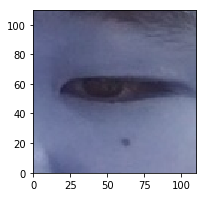

[9/r] ---------------------------------------------
pos (-25.48 54.00 170.97)
opt (-0.47 0.07 -0.88)
opt YP (28.201786196185534, 3.8681384713323825)


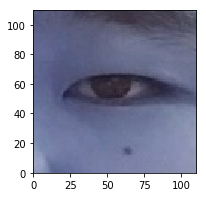

[10/r] ---------------------------------------------
pos (-26.85 54.45 179.24)
opt (-0.19 -0.04 -0.98)
opt YP (10.698511202679077, -2.329270811232299)


In [7]:
lk_vec, rk_vec = Vector3D(0,0,0), Vector3D(0,0,0)
trajectory = ScreenTrajectory()

def shot(idx, side="r"):
    def select(face, side):
        eye_img = face.r_eye_img if side == "r" else face.l_eye_img
        refs = face.get_references()
        pos = refs["{}_pos".format(side)]
        opt = refs["{}_opt".format(side)]
        tar = refs["{}_tar".format(side)]
        tar = Vector2D.from_np_vec(tar)
        
        return eye_img, pos, opt, tar

    def report(face):
        tx, ty = get_true_cam_xy(idx)
        eye_img, pos, opt, tar = select(face, side)
        trajectory.mark(idx, tar.x(), tar.y())
        show_image(eye_img, extent=(0,110,0,110), fig_size=(3, 3))
        print("[{}/{}] ---------------------------------------------".format(idx, side))
        print("pos {}".format(pos))
        print("opt {}".format(opt))
        print("opt YP {}".format(opt.to_yaw_pitch()))
#         print("tar {} / truth ({}, {})".format(tar, tx, ty))

    face.match(imgs[idx])
    face.analysis()
    face.compute_gaze_target_pos_in_mm(lk_vec, rk_vec)
    report(face)
    
for i in range(11):
    shot(i)

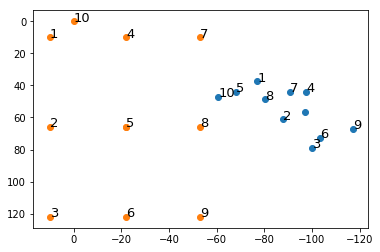

In [8]:
trajectory.plot_scatter()